# Machine learning project - Seoul bike sharing demand data set.
Yanis Boutouba - Wael Ben Baccar - Loick Cuer

## STEP 1 and 2 : Data visualisation and Data Pre-processing

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date as dt
import calendar

import warnings
warnings.filterwarnings('ignore')

#load data
data=pd.read_csv("SeoulBikeData.csv",encoding= 'unicode_escape')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Variable presentation
Here are all the columns of the DataSet :  

<li>Date : The day of the day, during 365 days, type : str                  
<li>Rented Bike Count : Number of rented bikes per hour which is the target, type : int 
<li>Hour: The hour of the day, type : int
<li>Temperature(°C): Temperature per hour, type : Float
<li>Humidity(%): Humidity in the air in %, type : int            
<li>Wind speed (m/s) : Speed of the wind in m/s, type : Float
<li>Visibility (10m): Visibility in m, type : int
<li>Dew point temperature(°C): Temperature at the beggining of the day, type : Float
<li>Solar Radiation (MJ/m2): Sun contribution, type : Float
<li>Rainfall(mm): Amount of rain in mm, type : Float
<li>Snowfall (cm): Amount of snow in cm, type : Float
<li>Seasons: Season of the year, type : str
<li>Holiday: If it is holiday period, type: str
<li>Functioning Day: If it is a Functioning Day, type : str

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [101]:
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

This allows us to know the different categories included in the dataframe but most importantly, the number of unique values in each columns. For example the season column has values as it should since there are seasons in a year.

In [102]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Let's rename some features for lisibility and convenience.

In [103]:
data=data.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

Attribute Information:

Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of the day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [104]:
data=data.astype({'Hour':'object'})

Let's change our Holiday and Functioning day features' boolean values for lisibility and convenience.

In [105]:
Hol_label = {'Holiday': {'Holiday': 'Yes', 'No Holiday': 'No'}}
data = data.replace(Hol_label)
Fd_label = {'Functional Day': {'Fun': 'Yes', 'NoFunc(': 'No'}}
data = data.replace(Fd_label)
data

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No,Yes


We'll create 3 new columns by extracting the day, the month and the year of the date

In [106]:
data['Date'] = pd.to_datetime(data['Date'])
#We'll create 3 new columns by extracting the day, the month and the year of the date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.tail()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30


Let's add a column in our dataset specifying which weekday corresponds to each date for further analysis

In [107]:
#data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Day of the week'] = data['Date'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
data['Day of the week'] = data['Day of the week'].apply(lambda x: days[x])
data

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day,Day of the week
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30,Fri
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30,Fri
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30,Fri
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30,Fri


In [108]:
# drop the Date column after extracting necessory information
data.drop(columns=['Date'],inplace=True)
data.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day,Day of the week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs


Let's check for some missing values.

In [89]:
data.isnull().sum()

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Year                     0
Month                    0
Day                      0
Day of the week          0
dtype: int64

We can now confidently say that the dataset has no missing values.

The rented bike count feature will be our target. Let's analyze it.

<AxesSubplot:xlabel='Temperature'>

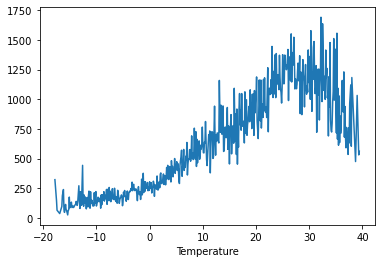

In [12]:
data.groupby('Temperature').mean()['Rented Bike Count'].plot()

According to this plot. Korean people are more likely to rent a bike when the temperature is around 25-30 °C.

<AxesSubplot:xlabel='Wind speed'>

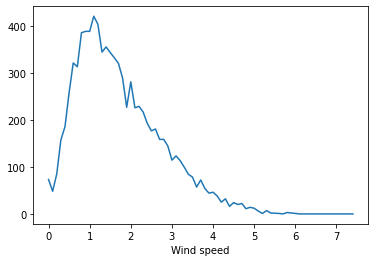

In [13]:
data.groupby('Wind speed')['Rented Bike Count'].count().plot()

It seems obvious but korean people tend to rent more bikes when the wind speed is low.

Let's have a look at the distribution of our target variable.

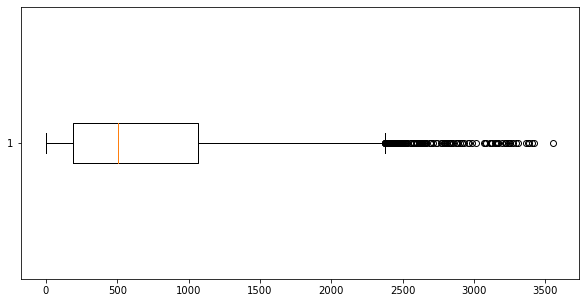

In [14]:
plt.figure(figsize=(10,5))
plt.boxplot(data['Rented Bike Count'],vert=False)
plt.show()

We can see that in average, around 500 bikes are rented by hour. The dataset seems positively skewed. Half of the time, between 200 and 1100 bikes are rented by hour.

Let's have a look at the correlation table of each features of our dataset.

<AxesSubplot:>

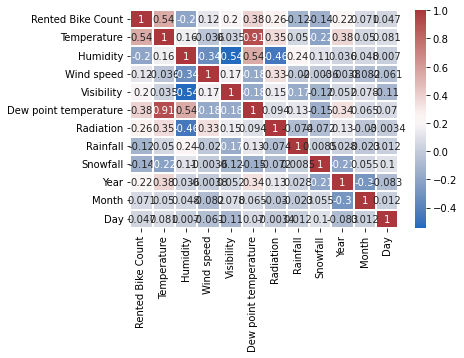

In [15]:
data_corr= data.corr()       
sns.heatmap(data_corr, cmap='vlag', linewidths=0.1, annot=True, linecolor='white')

<AxesSubplot:>

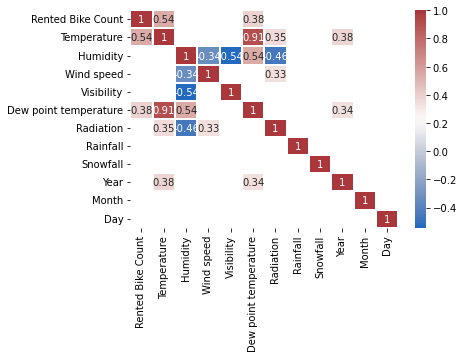

In [16]:
Limited_data_corr=data.corr()[abs(data.corr()) > 0.3]
sns.heatmap(Limited_data_corr, cmap='vlag', linewidths=0.1, annot=True, linecolor='white')

We consider that a correlation coefficient between (-)0.3 and (-)0.7 indicate a moderate linear relationship and that a correlation coefficient between (-)0.7 and (-)1 indicate a strong linear relationship.
With this correlation table, we can say that the rented bike count (our target variable) is moderately and positively correlated with the hour, the temperature, and the dew point temperature.
Moreover, we can see that the temperature feature and the dew point temperature are almost 0.91 correlated. Since we know these are variables that are quite similar, we can conclude that it's a multicollinearity issue. Then we can drop the dew point temperature feature.

In [109]:
data.drop(columns=['Dew point temperature'],inplace=True)
data

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day,Day of the week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No,Yes,2017,1,12,Thurs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30,Fri
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30,Fri
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30,Fri
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No,Yes,2018,11,30,Fri


Now, Let's analyze the impact of time on the seoul bike's rental.

<AxesSubplot:xlabel='Hour'>

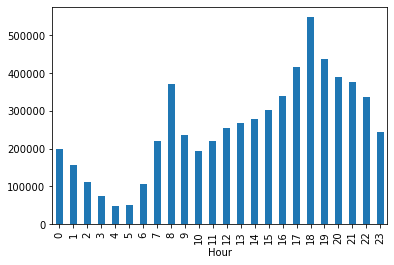

In [18]:
data.groupby('Hour').sum()['Rented Bike Count'].plot.bar()

We can see that korean people are used to rent bike around 8am and 6pm. So we can conclude that they use bikes mainly to go and come back to work.

<AxesSubplot:xlabel='Day of the week', ylabel='Rented Bike Count'>

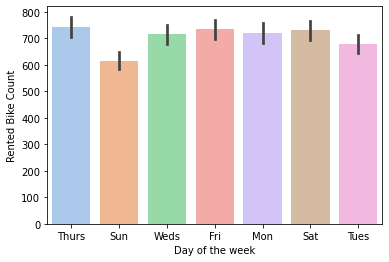

In [19]:
sns.barplot(data=data, x="Day of the week", y="Rented Bike Count",palette='pastel')
#Number of rented bikes every month of the year.

Korean people seems to use the bikes consistently throughout the week.So seoul bike rental remains more or less the same, even though less people work during Saturdays and Sundays, even if we can observe a slight rental decrease on Sundays since it's more of a rest day.

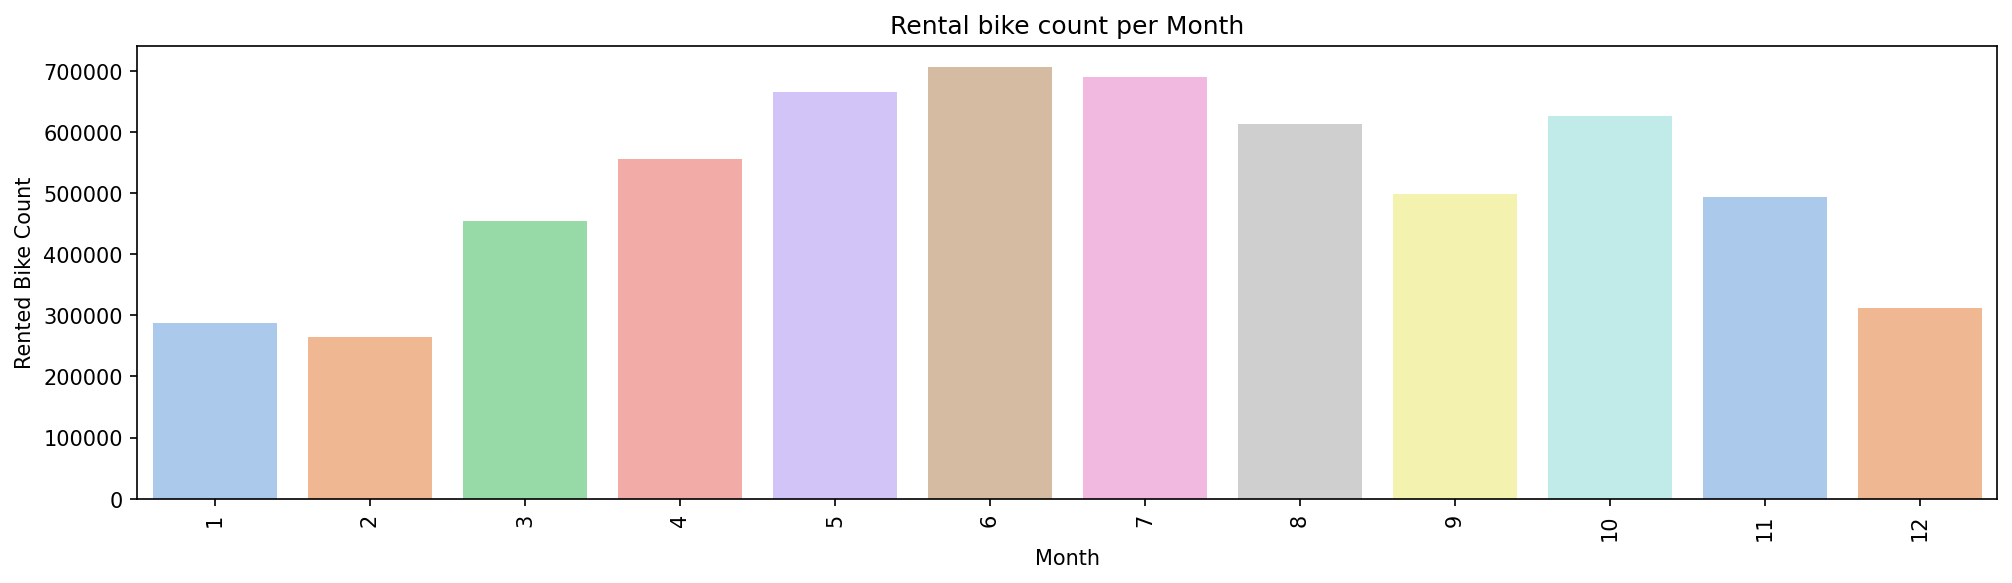

In [20]:
Month = data.groupby("Month").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Month", y="Rented Bike Count", data=Month,palette='pastel').set(title='Rental bike count per Month')
plt.xticks(rotation=90);

In [21]:
#Display the rented bike count for each season
data.groupby('Month').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Month,Rented Bike Count
0,6,706728
1,7,691339
2,5,665948
3,10,626988
4,8,614190
5,4,556219
6,9,499326
7,11,493412
8,3,455037
9,12,311771


In [22]:
data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


<AxesSubplot:ylabel='Rented Bike Count'>

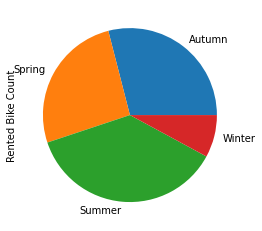

In [23]:
data.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

So korean people use bikes during the Summer/Spring months (May, June, July).

We saw with the correlation table that the most correlated variable to our target was the temperature. Obvioulsy and according to this barplot, summer is the hotter season of the year.

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

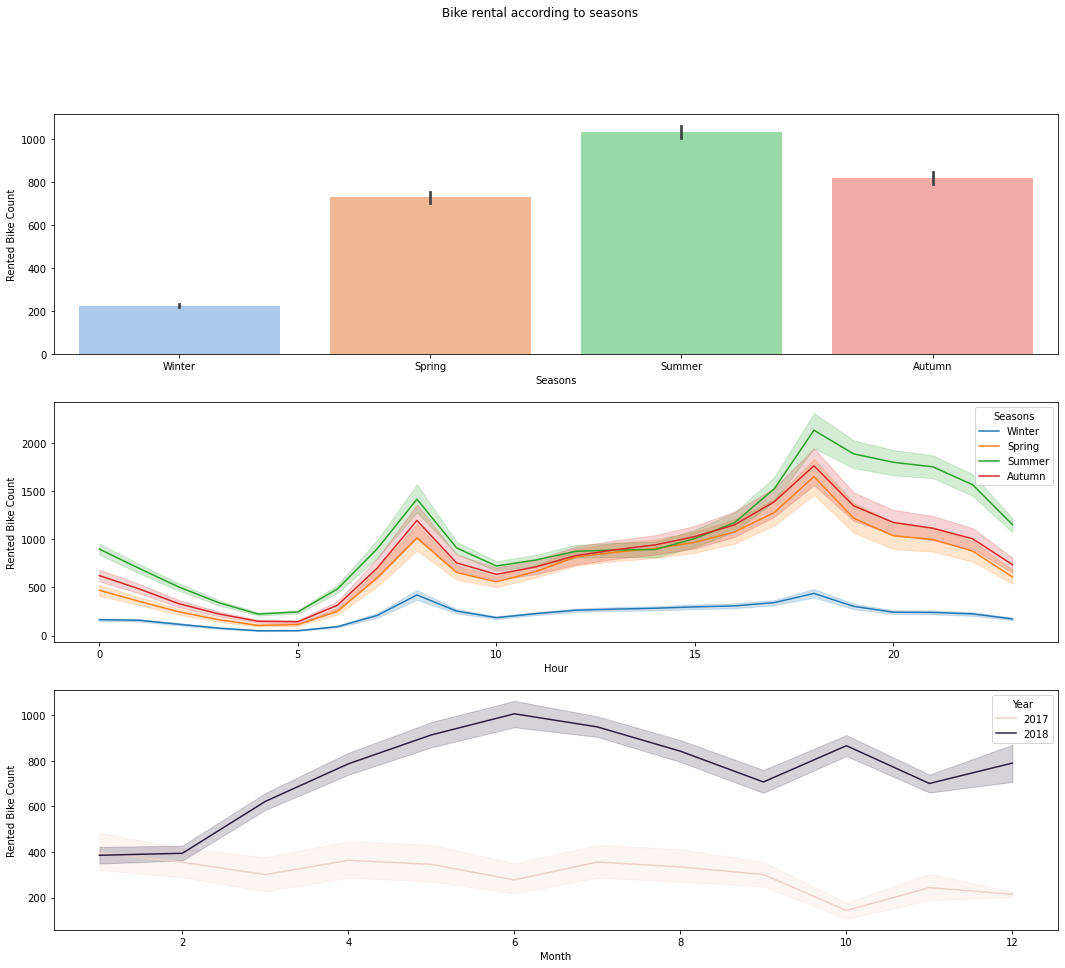

In [24]:
fig, axes = plt.subplots(3, 1,figsize=(18, 15))

fig.suptitle('Bike rental according to seasons')

sns.barplot(ax=axes[0], x="Seasons", y="Rented Bike Count", data=data,palette='pastel')
sns.lineplot(ax=axes[1], data=data, x="Hour", y="Rented Bike Count", hue="Seasons")
sns.lineplot(ax=axes[2], data=data, x="Month", y="Rented Bike Count", hue="Year")

Here we can see that there is a pattern in the number of rented bikes throughout each day. That's why we can add a new feature which will represent the number of bikes rented the day before at the same time. It should help us predicting the target.

In [110]:
data['rentedbikes_1dayago'] = data['Rented Bike Count'].shift(24)
data.drop(data.index[:24], inplace=True)

In [111]:
var=[col for col in data.select_dtypes(include=['float64','int64']).columns if col != 'Year']

Let's check the distribution of all the numeric features

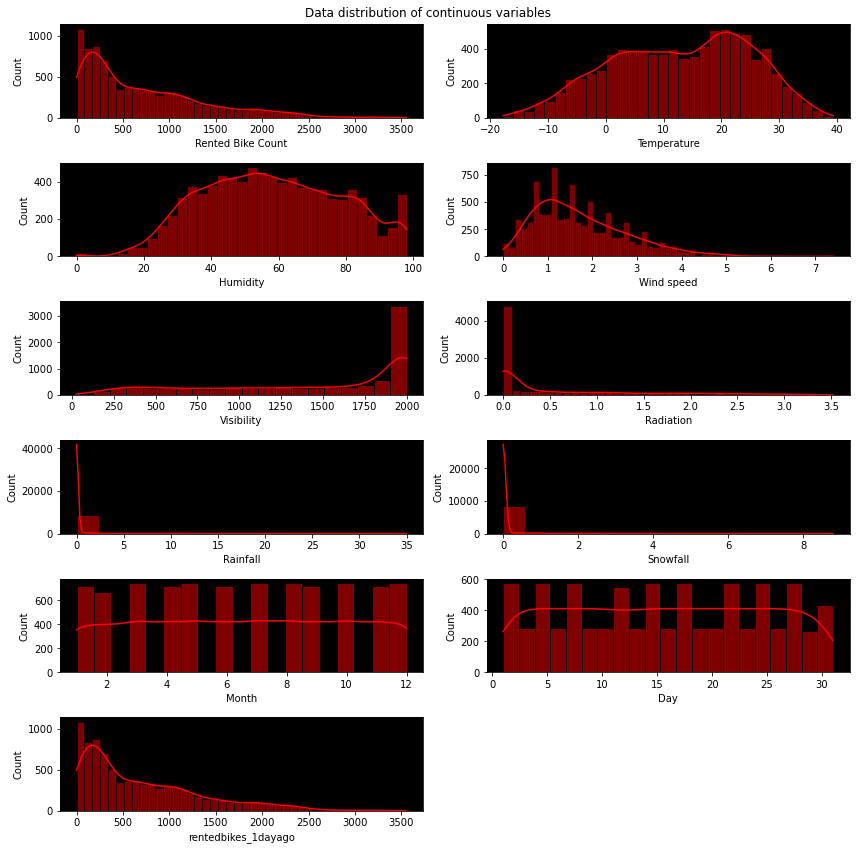

In [27]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(data[var]):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,2, i+1)
    sns.histplot(data=data, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

We will try to get a more symetric distributions by applying a power transformer

In [112]:
from sklearn.preprocessing import PowerTransformer
sc = PowerTransformer(method = 'yeo-johnson')
data[var]=sc.fit_transform(data[var])

In [113]:
data = data.reset_index(drop=True)
data

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day,Day of the week,rentedbikes_1dayago
0,-0.344779,0,-1.232399,1.381042,-0.509460,-0.841779,-0.846092,-0.253224,-0.231119,Winter,No,Yes,2017,-1.358657,-0.339641,Sun,-0.528675
1,-0.392004,1,-1.267055,1.335451,-1.240279,-0.847899,-0.846092,-0.253224,-0.231119,Winter,No,Yes,2017,-1.358657,-0.339641,Sun,-0.675066
2,-0.508732,2,-1.327815,1.335451,-0.042304,-0.419401,-0.846092,-0.253224,-0.231119,Winter,No,Yes,2017,-1.358657,-0.339641,Sun,-0.777930
3,-0.800757,3,-1.379991,1.106144,0.617236,-0.478185,-0.846092,-0.253224,-0.231119,Winter,No,Yes,2017,-1.358657,-0.339641,Sun,-1.045763
4,-1.138233,4,-1.406108,1.013768,0.445021,-0.567495,-0.846092,-0.253224,-0.231119,Winter,No,Yes,2017,-1.358657,-0.339641,Sun,-1.198660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,0.694084,19,-0.721750,-1.199694,0.931141,0.764187,-0.846092,-0.253224,-0.231119,Autumn,No,Yes,2018,1.248927,1.500308,Fri,0.721069
8732,0.402433,20,-0.789083,-1.041236,0.699295,0.979538,-0.846092,-0.253224,-0.231119,Autumn,No,Yes,2018,1.248927,1.500308,Fri,0.474575
8733,0.305931,21,-0.856550,-0.936771,-1.800125,0.914008,-0.846092,-0.253224,-0.231119,Autumn,No,Yes,2018,1.248927,1.500308,Fri,0.440997
8734,0.331329,22,-0.898798,-0.833182,-0.640385,0.694174,-0.846092,-0.253224,-0.231119,Autumn,No,Yes,2018,1.248927,1.500308,Fri,0.352408


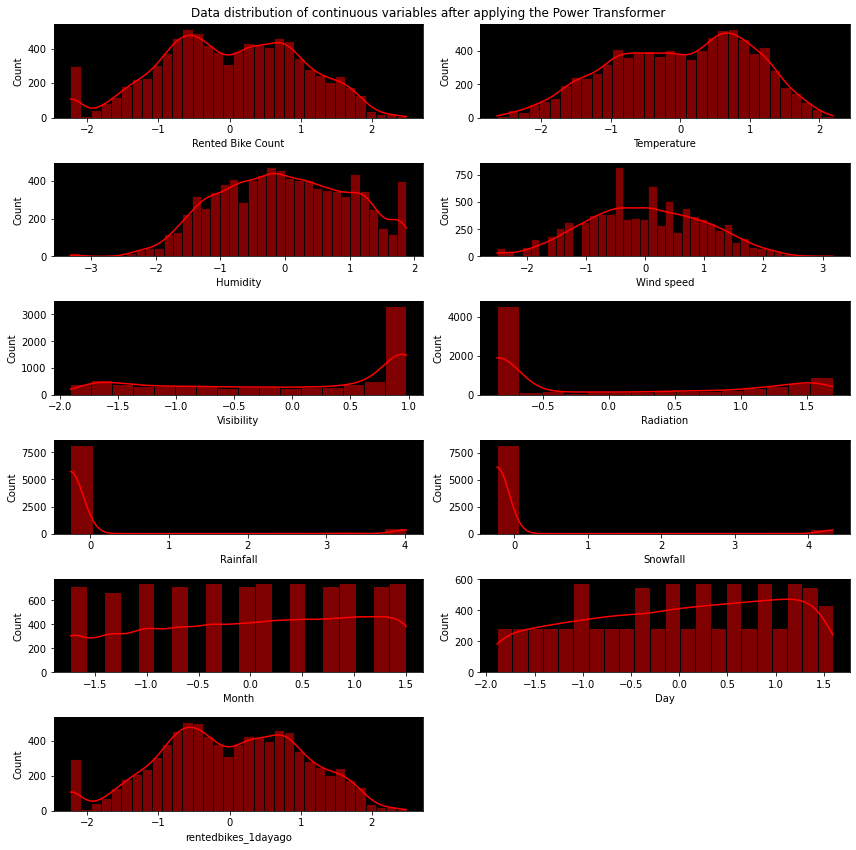

In [30]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(data[var]):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,2, i+1)
    sns.histplot(data=data, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables after applying the Power Transformer')
plt.tight_layout()

Let's check when our bikes are operative.

In [31]:
pd.pivot_table(data, index=['Holiday', 'Functioning Day'], columns='Seasons', values='Rented Bike Count',aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

Seasons                  Autumn  Spring  Summer  Winter  TOTAL
Holiday Functioning Day                                       
No      No                223.0    48.0     NaN     NaN    271
        Yes              1841.0  2088.0  2160.0  1944.0   8033
Yes     No                 24.0     NaN     NaN     NaN     24
        Yes                96.0    72.0    48.0   192.0    408
TOTAL                    2184.0  2208.0  2208.0  2136.0   8736

With this table we can say that in autumn, there are 24 records labelled as holiday and not functioning and 223 records as work day but not functioning. It represents nearly 11 days of inactivity.
In spring, there are 48 records labeled as work day but not functioning so 2 days of inactivity.
In conclusion, the bike rents do not function on some days in autumn and spring.
Moreover, we can see that there was way more holidays in Winter season.
Those two assumptions can explain partially why bikes are used less in Autumn and Winter.

### Encoding

In [31]:
#mapping_dictDay={'Mon':1,'Tues':2,'Weds':3,'Thurs':4,'Fri':5,'Sat':6,'Sun':7}
#data['WeekDayEncoding']=data['Day of the week'].map(mapping_dictDay)

In [114]:
data['Functioning Day']=data['Functioning Day'].map({'Yes':1,'No':0})
data['IsHoliday']=data['Holiday'].map({'No':0,'Yes':1})
data=data.astype({'Functioning Day':'uint8', 'IsHoliday':'uint8'})

In [118]:
data = pd.get_dummies(data,columns=['Seasons','Hour', 'Day of the week'])
data

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Radiation,Rainfall,Snowfall,Holiday,Functioning Day,...,Hour_21,Hour_22,Hour_23,Day of the week_Fri,Day of the week_Mon,Day of the week_Sat,Day of the week_Sun,Day of the week_Thurs,Day of the week_Tues,Day of the week_Weds
0,-0.344779,-1.232399,1.381042,-0.509460,-0.841779,-0.846092,-0.253224,-0.231119,No,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.392004,-1.267055,1.335451,-1.240279,-0.847899,-0.846092,-0.253224,-0.231119,No,1,...,0,0,0,0,0,0,1,0,0,0
2,-0.508732,-1.327815,1.335451,-0.042304,-0.419401,-0.846092,-0.253224,-0.231119,No,1,...,0,0,0,0,0,0,1,0,0,0
3,-0.800757,-1.379991,1.106144,0.617236,-0.478185,-0.846092,-0.253224,-0.231119,No,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.138233,-1.406108,1.013768,0.445021,-0.567495,-0.846092,-0.253224,-0.231119,No,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,0.694084,-0.721750,-1.199694,0.931141,0.764187,-0.846092,-0.253224,-0.231119,No,1,...,0,0,0,1,0,0,0,0,0,0
8732,0.402433,-0.789083,-1.041236,0.699295,0.979538,-0.846092,-0.253224,-0.231119,No,1,...,0,0,0,1,0,0,0,0,0,0
8733,0.305931,-0.856550,-0.936771,-1.800125,0.914008,-0.846092,-0.253224,-0.231119,No,1,...,1,0,0,1,0,0,0,0,0,0
8734,0.331329,-0.898798,-0.833182,-0.640385,0.694174,-0.846092,-0.253224,-0.231119,No,1,...,0,1,0,1,0,0,0,0,0,0


In [119]:
data = data.drop('Holiday', axis=1)

We can drop the rows when there is not a functioning day because 0 bikes are rented during those days.

In [110]:
#data = data[data['Functioning Day']!=0]

In [121]:
data.shape

(8736, 49)

### Dealing with outliers

In this part, after many tests, we saw that the differents models worked better with the outliers than without (probably due to an underfitting effect). That's why, we decided to keep the outliers

<AxesSubplot:>

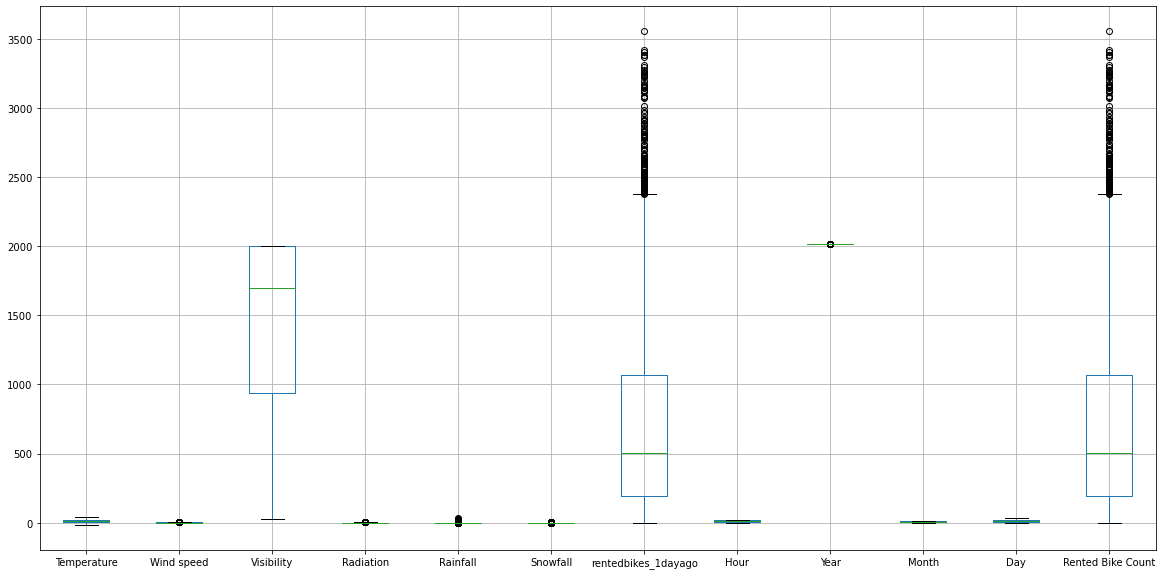

In [176]:
#data2 = data.copy()
###Choosing which columns to work with
#outliers = ["Temperature","Wind speed","Visibility","Radiation","Rainfall","Snowfall","rentedbikes_1dayago","Hour","Year","Month","Day","Rented Bike Count"]
###We apply a boxplot on those columns
#plt.figure(figsize=(20,10))
#data2.boxplot(outliers)

In [177]:
###transforming every ouliers values into null values
#for x in outliers:
#    q75,q25 = np.percentile(data2.loc[:,x],[75,25])
#    intr_qr = q75-q25
 
#    max = q75+(1.5*intr_qr)
#    min = q25-(1.5*intr_qr)
 
#    data2.loc[data2[x] < min,x] = np.nan
#    data2.loc[data2[x] > max,x] = np.nan

In [178]:
###checking the number of null values in each columns
#data2.isnull().sum()

Rented Bike Count      155
Hour                     0
Temperature              0
Humidity                 0
Wind speed             161
Visibility               0
Radiation              641
Rainfall               528
Snowfall               443
Seasons                  0
Holiday                  0
Functioning Day          0
Year                   720
Month                    0
Day                      0
Day of the week          0
rentedbikes_1dayago    155
dtype: int64

In [179]:
###deleting every rows containing null values
#data2 = data2.dropna(axis=0)

In [180]:
###checking the number of null values in each columns again
#data2.isnull().sum()

Rented Bike Count      0
Hour                   0
Temperature            0
Humidity               0
Wind speed             0
Visibility             0
Radiation              0
Rainfall               0
Snowfall               0
Seasons                0
Holiday                0
Functioning Day        0
Year                   0
Month                  0
Day                    0
Day of the week        0
rentedbikes_1dayago    0
dtype: int64

In [182]:
#data2.shape

(6302, 28)

# STEP 3 : Modeling and Feature Selection

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import cross_val_score
import time

In [123]:
num_var = [col for col in data.columns if col != 'Rented Bike Count']

target = ["Rented Bike Count"]

Let's split the dataset into a train and a test

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

X = data.drop("Rented Bike Count", axis=1)
y = data["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Selection

After many tests, it appears that our models worked better with all the features than only with the best ones. That's why we decided to keep them all.

In [421]:
#fs = SelectKBest(score_func=f_regression, k='all')
#fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x0000017CD1E84280>)

In [422]:
#feature_contribution=(fs.scores_/sum(fs.scores_))*100

Temperature : 17.65%
Humidity : 1.65%
Wind speed : 0.60%
Visibility : 1.83%
Radiation : 3.09%
Rainfall : 0.64%
Snowfall : 0.90%
Year : 2.15%
Month : 0.26%
Day : 0.06%
rentedbikes_1dayago : 43.50%
WeekDayEncoding : 0.02%
IsHoliday : 0.19%
Hour_0 : 0.11%
Hour_1 : 0.33%
Hour_2 : 0.71%
Hour_3 : 1.11%
Hour_4 : 1.46%
Hour_5 : 1.43%
Hour_6 : 0.76%
Hour_7 : 0.04%
Hour_8 : 0.42%
Hour_9 : 0.02%
Hour_10 : 0.14%
Hour_11 : 0.05%
Hour_14 : 0.01%
Hour_15 : 0.07%
Hour_16 : 0.22%
Hour_17 : 0.83%
Hour_18 : 2.95%
Hour_19 : 1.06%
Hour_20 : 0.58%
Hour_21 : 0.47%
Hour_22 : 0.21%
Seasons_Autumn : 1.06%
Seasons_Summer : 3.28%
Seasons_Winter : 10.16%


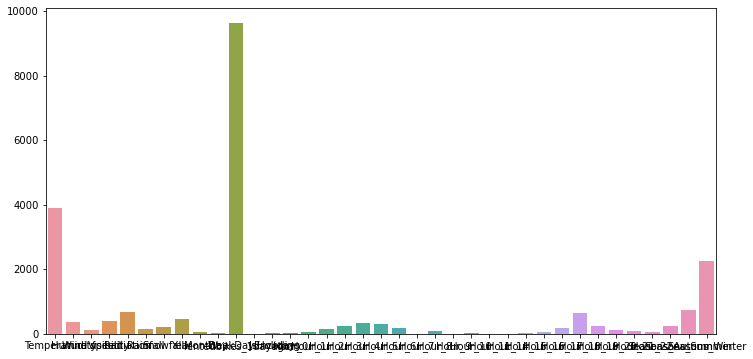

In [423]:
#for i,j in enumerate(X.columns):
#    print(f'{j} : {feature_contribution[i]:.2f}%')
#    if feature_contribution[i] <= 0.1:
#         data = data.drop(j, axis=1)
#plt.figure(figsize=(12,6))
#sns.barplot(x=X.columns,y=fs.scores_)
#plt.show()

Let's create a pipeline to standardize our data before using each model

In [125]:
###After many tests,it appears that the MaxAbsScaler worked best
numeric_transformer = Pipeline(steps=[("scaler", MaxAbsScaler())])
#numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])
#numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preproc = ColumnTransformer(transformers=[("num", numeric_transformer, num_var)])
                                          

In [126]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [128]:
models = [("LR",LinearRegression()),
          ("PR", PolynomialRegression()),
         ("svr", LinearSVR()),
         ("DT", DecisionTreeRegressor(random_state=1)),
         ('knn', KNeighborsRegressor()),
         ("RF", RandomForestRegressor(random_state=1))]

grids = {"RF" : {'RF__n_estimators' : np.arange(60,250,30),
                 'RF__max_depth': np.arange(5, 20)
                 },
         "svr" : {'svr__C': [5, 7, 10, 15,20,25]},
         "LR" : {'LR__fit_intercept': [True, False]},
         "PR" : {'PR__polynomialfeatures__degree': [1,2,3],'PR__linearregression__fit_intercept': [True, False]},
         "DT" : {'DT__max_depth': np.arange(1, 10)},
         "knn" : {'knn__n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15]}
        }

for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    reg = GridSearchCV(pipe, grids[name], cv=3)
    reg.fit(X_train, y_train)
    print('Returned hyperparameter: {}'.format(reg.best_params_))
    print('Best regression accuracy in train is: {}'.format(reg.best_score_))
    print('Regression accuracy on test is: {}'.format(reg.score(X_test, y_test)))
    print()

Returned hyperparameter: {'LR__fit_intercept': True}
Best regression accuracy in train is: 0.8184012859054697
Regression accuracy on test is: 0.8020385145521969

Returned hyperparameter: {'PR__linearregression__fit_intercept': True, 'PR__polynomialfeatures__degree': 2}
Best regression accuracy in train is: 0.8995815910011565
Regression accuracy on test is: 0.9042007463785586

Returned hyperparameter: {'svr__C': 5}
Best regression accuracy in train is: 0.8097030734274192
Regression accuracy on test is: 0.7949854501762174

Returned hyperparameter: {'DT__max_depth': 8}
Best regression accuracy in train is: 0.8203569497789799
Regression accuracy on test is: 0.8201856908865777

Returned hyperparameter: {'knn__n_neighbors': 7}
Best regression accuracy in train is: 0.8151145001863019
Regression accuracy on test is: 0.8177631405290825

Returned hyperparameter: {'RF__max_depth': 19, 'RF__n_estimators': 240}
Best regression accuracy in train is: 0.8932391381888863
Regression accuracy on test is:

## Model Comparison

In [129]:
model_comparison={}

### Linear Regression

In [142]:
transformer = MaxAbsScaler().fit(X_train)
X_train_process = transformer.transform(X_train)
X_test_process = transformer.transform(X_test)
start = time.time()
model=LinearRegression(fit_intercept = True) 
model.fit(X_train_process,y_train) 
end_train = time.time()
y_pred=model.predict(X_test_process)
end_predict = time.time()
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred, squared=False)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train_process, y = y_train, cv = 5)
print("Cross Val R-Square: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred)*100,(accuracies.mean())*100,(accuracies.std())*100,end_train-start,end_predict-end_train]

Model R-Square : 80.20%
Model MSE : 43.66%
Cross Val R-Square: 81.85 %
Cross Val Standard Deviation: 0.75 %


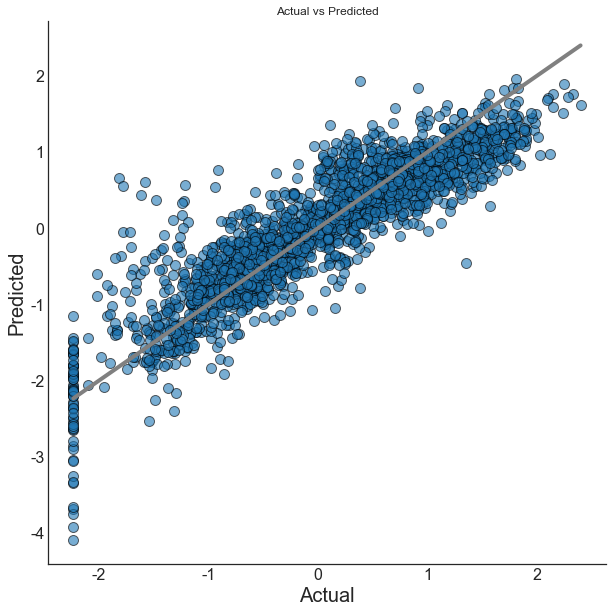

In [143]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16
fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,                
                    y=y_pred,                
                    s=100,                
                    alpha=0.6,                
                    linewidth=1,                
                    edgecolor='black',                
                    ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],             
                 y=[min(y_test),max(y_test)],             
                 linewidth=4,             
                 color='gray',             
                 ax=ax)
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

### Polynomial Regression

In [144]:
transformer = MaxAbsScaler().fit(X_train)
X_train_process = transformer.transform(X_train)
X_test_process = transformer.transform(X_test)
start = time.time()
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression(fit_intercept= True)
model.fit(poly_reg.fit_transform(X_train),y_train) 
end_train = time.time()
y_pred=model.predict(poly_reg.fit_transform(X_test))
end_predict = time.time()
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val R-Square: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred)*100,(accuracies.mean())*100,(accuracies.std())*100,end_train-start,end_predict-end_train]

Model R-Square : 90.42%
Model MSE : 9.22%
Cross Val R-Square: 81.85 %
Cross Val Standard Deviation: 0.75 %


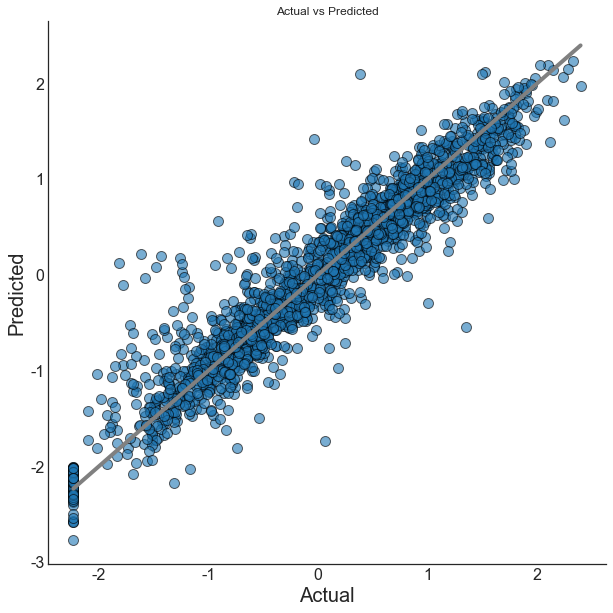

In [145]:
fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,                
                    y=y_pred,                
                    s=100,                
                    alpha=0.6,                
                    linewidth=1,                
                    edgecolor='black',                
                    ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],             
                 y=[min(y_test),max(y_test)],             
                 linewidth=4,             
                 color='gray',             
                 ax=ax)
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

### Decision Tree

In [146]:
transformer = MaxAbsScaler().fit(X_train)
X_train_process = transformer.transform(X_train)
X_test_process = transformer.transform(X_test)
start = time.time()
model=DecisionTreeRegressor(random_state=1,max_depth= 8)
model.fit(X_train,y_train) 
end_train = time.time()
y_pred=model.predict(X_test)
end_predict = time.time()
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val R-Square: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred)*100,(accuracies.mean())*100,(accuracies.std())*100,end_train-start,end_predict-end_train]

Model R-Square : 81.94%
Model MSE : 17.39%
Cross Val R-Square: 82.69 %
Cross Val Standard Deviation: 1.29 %


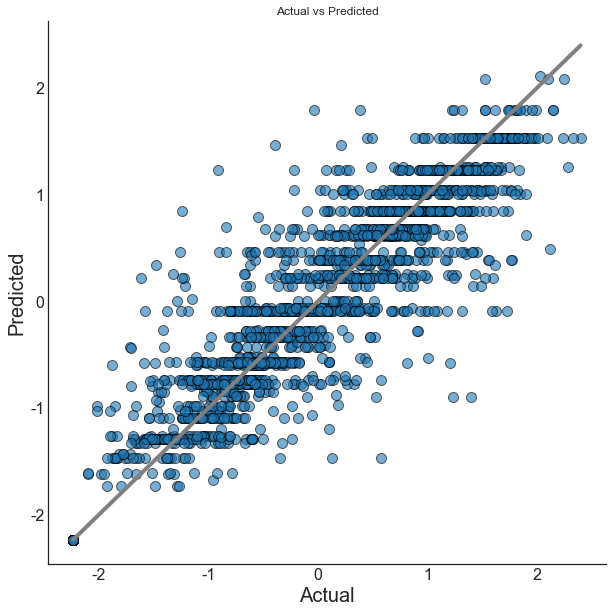

In [147]:
fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,                
                    y=y_pred,                
                    s=100,                
                    alpha=0.6,                
                    linewidth=1,                
                    edgecolor='black',                
                    ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],             
                 y=[min(y_test),max(y_test)],             
                 linewidth=4,             
                 color='gray',             
                 ax=ax)
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

### SVR

In [149]:
transformer = MaxAbsScaler().fit(X_train)
X_train_process = transformer.transform(X_train)
X_test_process = transformer.transform(X_test)
start = time.time()
model=LinearSVR(C= 5)
model.fit(X_train,y_train)
end_train = time.time()
y_pred=model.predict(X_test)
end_predict = time.time()
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val R-Square: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['SVR']=[r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred)*100,(accuracies.mean())*100,(accuracies.std())*100,end_train-start,end_predict-end_train]

Model R-Square : 51.85%
Model MSE : 46.36%
Cross Val R-Square: 37.06 %
Cross Val Standard Deviation: 23.79 %


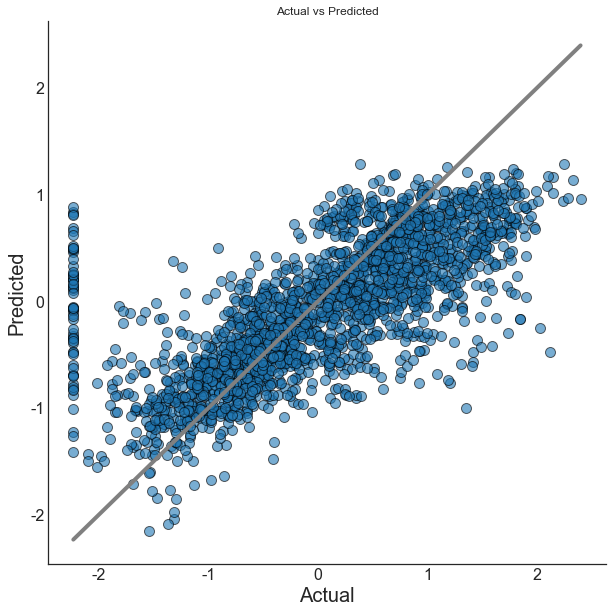

In [150]:
fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,                
                    y=y_pred,                
                    s=100,                
                    alpha=0.6,                
                    linewidth=1,                
                    edgecolor='black',                
                    ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],             
                 y=[min(y_test),max(y_test)],             
                 linewidth=4,             
                 color='gray',             
                 ax=ax)
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

### KNN

In [151]:
transformer = MaxAbsScaler().fit(X_train)
X_train_process = transformer.transform(X_train)
X_test_process = transformer.transform(X_test)
start = time.time()
model= KNeighborsRegressor(n_neighbors= 8)
model.fit(X_train,y_train) 
end_train = time.time()
y_pred=model.predict(X_test)
end_predict = time.time()
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val R-Square: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['KNN']=[r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred)*100,(accuracies.mean())*100,(accuracies.std())*100,end_train-start,end_predict-end_train]

Model R-Square : 81.84%
Model MSE : 17.49%
Cross Val R-Square: 79.62 %
Cross Val Standard Deviation: 0.51 %


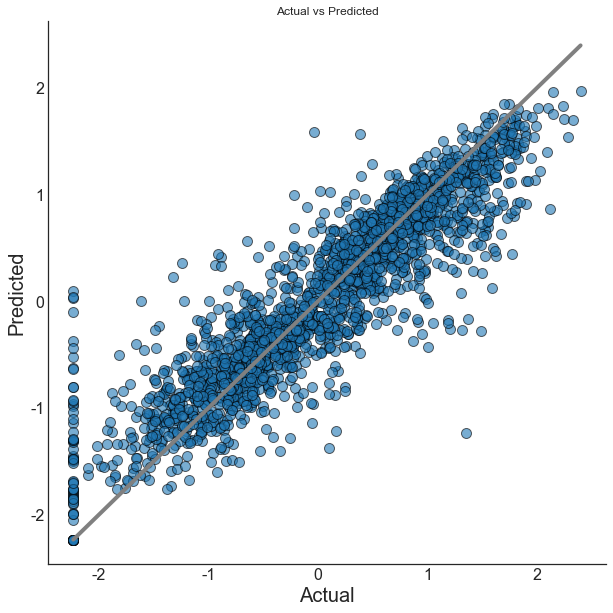

In [152]:
fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,                
                    y=y_pred,                
                    s=100,                
                    alpha=0.6,                
                    linewidth=1,                
                    edgecolor='black',                
                    ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],             
                 y=[min(y_test),max(y_test)],             
                 linewidth=4,             
                 color='gray',             
                 ax=ax)
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

### Random Forest

In [153]:
transformer = MaxAbsScaler().fit(X_train)
X_train_process = transformer.transform(X_train)
X_test_process = transformer.transform(X_test)
start = time.time()
model= RandomForestRegressor(random_state=1,max_depth= 19,n_estimators= 240)
model.fit(X_train,y_train) 
end_train = time.time()
y_pred=model.predict(X_test)
end_predict = time.time()
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val R-Square: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['RF']=[r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred)*100,(accuracies.mean())*100,(accuracies.std())*100,end_train-start,end_predict-end_train]

Model R-Square : 89.75%
Model MSE : 9.87%
Cross Val R-Square: 89.71 %
Cross Val Standard Deviation: 0.92 %


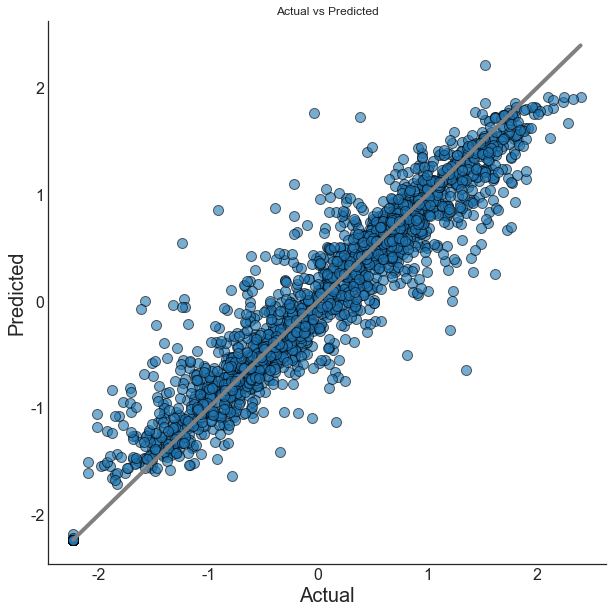

In [154]:
fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,                
                    y=y_pred,                
                    s=100,                
                    alpha=0.6,                
                    linewidth=1,                
                    edgecolor='black',                
                    ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],             
                 y=[min(y_test),max(y_test)],             
                 linewidth=4,             
                 color='gray',             
                 ax=ax)
plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +                  
                   'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_pred,squared=False))),             
             xy=(0,3000),             
             size='medium')
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

### Comparison

In [155]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square (%)','MSE (%)','CV R-Square (%)','CV std (%)','Time to train (secondes)','Time to predict (secondes)']
Model_com_df=Model_com_df.sort_values(by='R-Square (%)',ascending=False)
Model_com_df.style.background_gradient(cmap='RdYlBu_r')

,R-Square (%),MSE (%),CV R-Square (%),CV std (%),Time to train (secondes),Time to predict (secondes)
Polynomial Regression,90.421203,9.222543,81.845652,0.750530,0.506417,0.032913
RF,89.753698,9.865222,89.710139,0.924676,8.587755,0.090759
Decision Tree Regression,81.940411,17.387917,82.690024,1.291261,0.028930,0.002985
KNN,81.837306,17.487188,79.615288,0.513011,0.002575,0.264268
Linear Regression,80.203851,19.059891,81.845273,0.750338,0.012965,0.000000
SVR,51.849174,46.360002,37.057300,23.787940,0.391312,0.001975


In [156]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column")

,R-Square (%),MSE (%),CV R-Square (%),CV std (%),Time to train (secondes),Time to predict (secondes)
Polynomial Regression,90.421203,9.222543,81.845652,0.750530,0.506417,0.032913
RF,89.753698,9.865222,89.710139,0.924676,8.587755,0.090759
Decision Tree Regression,81.940411,17.387917,82.690024,1.291261,0.028930,0.002985
KNN,81.837306,17.487188,79.615288,0.513011,0.002575,0.264268
Linear Regression,80.203851,19.059891,81.845273,0.750338,0.012965,0.000000
SVR,51.849174,46.360002,37.057300,23.787940,0.391312,0.001975


In [157]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column")

,R-Square (%),MSE (%),CV R-Square (%),CV std (%),Time to train (secondes),Time to predict (secondes)
Polynomial Regression,90.421203,9.222543,81.845652,0.750530,0.506417,0.032913
RF,89.753698,9.865222,89.710139,0.924676,8.587755,0.090759
Decision Tree Regression,81.940411,17.387917,82.690024,1.291261,0.028930,0.002985
KNN,81.837306,17.487188,79.615288,0.513011,0.002575,0.264268
Linear Regression,80.203851,19.059891,81.845273,0.750338,0.012965,0.000000
SVR,51.849174,46.360002,37.057300,23.787940,0.391312,0.001975


## Conclusion

By comparing the models, we find out that the random forest have the best R-Square in general. However, we have to look at the time it takes the model to train and predict. Here, the random forest takes more time than the other models. So, if we are in a situation where we have constraint in time we should look to the ratio between the accuracy and the time and maybe take the polynomial regression, the knn, or the decision tree model. In our case, we don't have such constraint so we decided to pick the random forest model with a max_depth of 19 and a 240 estimators.

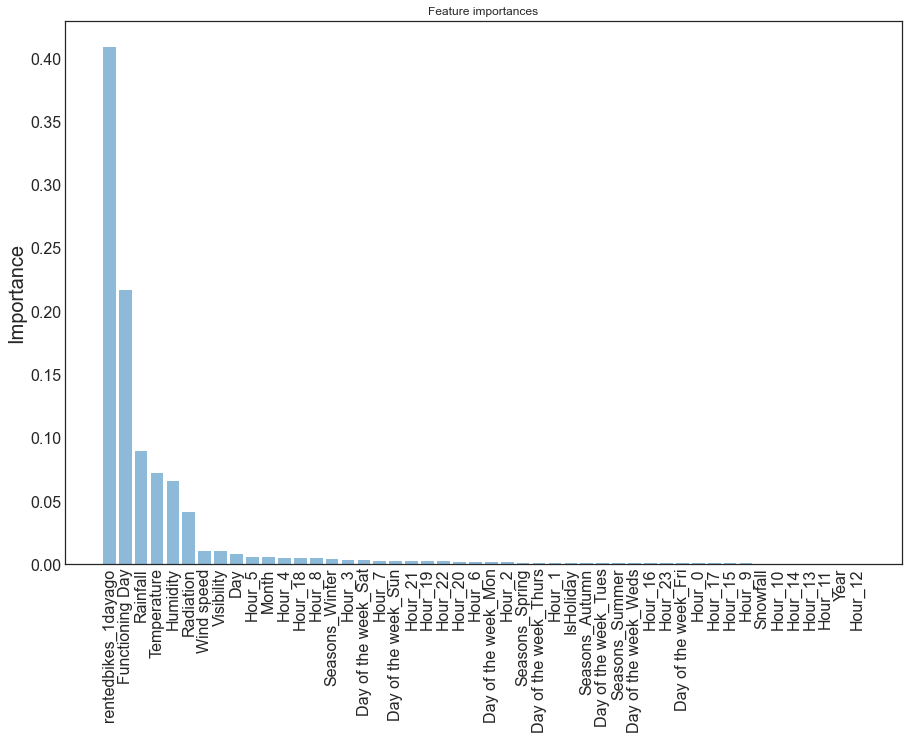

In [169]:
fi = {'variables':X.columns,'importance':model.feature_importances_}
importances = pd.DataFrame(fi).sort_values(by='importance',ascending=False)
f = plt.figure(figsize=(15,10))
y_pos = np.arange(len(importances['variables']))
plt.bar(y_pos, importances['importance'], align='center', alpha=0.5)
plt.xticks(y_pos, importances['variables'], rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()

Here we can see that the most important features that help the model predict the target are the number of bike rented the day before at the same time, if it is a functioning day, and the weather conditions (Temperature, rain fall, humidity...).
It seems pretty logic.

# Exporting API

In [159]:
import pickle

In [160]:
Xprocess = MaxAbsScaler().fit_transform(X_train)
model= RandomForestRegressor(random_state=1,max_depth= 19,n_estimators= 240)
model.fit(Xprocess,y_train) 
pickle.dump(model, open("model.pkl",'wb'))

In [161]:
modelfinal=pickle.load(open("model.pkl",'rb'))